In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [180]:
df_x=pd.read_csv("logisticX.csv", header=None,sep=',',names=['valueX1','valueX2'])
df_y=pd.read_csv("logisticY.csv", header=None,sep='\t',names=['valueY'])

In [181]:
df_x

,valueX1,valueX2
0,3.8915,4.2105
1,3.6898,6.6051
2,2.7763,7.5057
3,3.1137,5.7724
4,2.9251,5.4315
...,...,...
95,5.7629,4.6161
96,4.1817,4.0577
97,6.3065,2.4776
98,5.6043,3.3146


In [182]:
df_y

,valueY
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


# Q1: Train the model with a learning rate of 0.1 until convergence

In [183]:
def normalize(data):
    min_val = np.min(data, axis=0)  #minimum value of each column
    max_val = np.max(data, axis=0)  #maximum value of each column
    return (data - min_val) / (max_val - min_val)  # Normalize each value to [0, 1]

X = normalize(df_x.values)  # Normalizing input data
y = df_y.values.flatten()
m, n = X.shape              # number of samples(m) and features(n)

In [184]:
X

array([[0.35145442, 0.44790148],
       [0.3225381 , 0.84910782],
       [0.19157599, 1.        ],
       [0.23994667, 0.70959202],
       [0.21290841, 0.6524755 ],
       [0.31968517, 0.82154645],
       [0.20076556, 0.38140236],
       [0.33445156, 0.62035687],
       [0.17296747, 0.3279551 ],
       [0.37994065, 0.73596381],
       [0.27148653, 0.66887828],
       [0.        , 0.7192762 ],
       [0.32283916, 0.59204155],
       [0.43160868, 0.35047332],
       [0.4776282 , 0.83119712],
       [0.32838731, 0.5540253 ],
       [0.50846559, 0.69419452],
       [0.39502244, 0.82395912],
       [0.59874127, 0.7603753 ],
       [0.3336344 , 0.52497277],
       [0.36442877, 0.62030661],
       [0.35813513, 0.62767865],
       [0.37565409, 0.83071123],
       [0.41513627, 0.88037195],
       [0.44882657, 0.48544861],
       [0.15336975, 0.49315573],
       [0.1089989 , 0.685968  ],
       [0.48770662, 0.66375136],
       [0.43450461, 0.69783028],
       [0.17349791, 0.48760995],
       [0.

In [185]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [186]:
#Adding a column of ones to X for the bias term
X = np.hstack((np.ones((m, 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    h = sigmoid(np.dot(X, theta))  # Predicted values
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))  # Logistic regression cost formula
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))  # Predicted values
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

#Initialize parameters
theta = np.zeros(n + 1)  # n+1 because we added the bias term

#Training model with lr=0.1 & 1000 iterations
alpha = 0.1
iterations = 1000
optimal_theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

print("Cost after convergence:", cost_history[-1])
print("Optimal theta:", optimal_theta)

Cost after convergence: 0.3524425198604714
Optimal theta: [ 0.31408539  3.76824158 -4.01198758]


# Q2: Plot cost vs. iteration graph

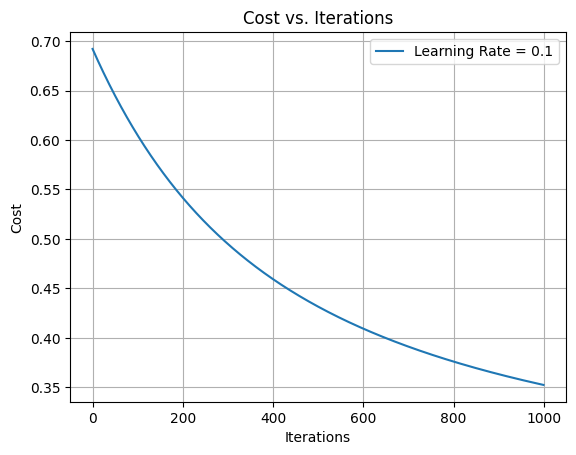

In [187]:
#Ploting cost vs. iteration graph
plt.figure()
plt.plot(range(len(cost_history)), cost_history, label="Learning Rate = 0.1")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.grid()
plt.legend()
plt.show()

# Q3: Plot the dataset and decision boundary

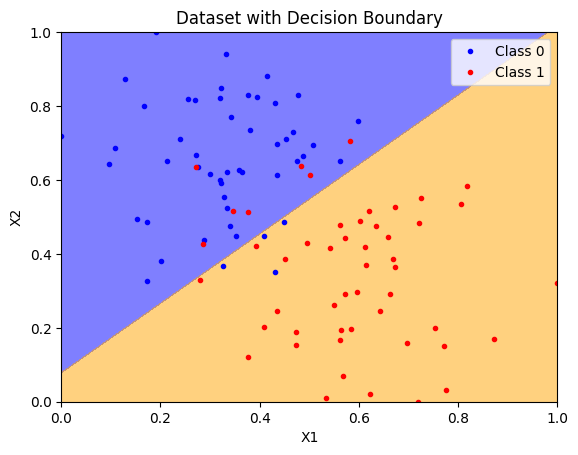

In [188]:
plt.figure()
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

# Calculating predictions
grid = np.c_[np.ones(x1.ravel().shape), x1.ravel(), x2.ravel()]
preds = sigmoid(np.dot(grid, optimal_theta)).reshape(x1.shape)

# Ploting decision boundary
plt.contourf(x1, x2, preds, levels=[0, 0.5, 1], colors=["blue", "orange"], alpha=0.5, linestyles=None)

plt.plot(X[y == 0, 1], X[y == 0, 2], "b.", label="Class 0")
plt.plot(X[y == 1, 1], X[y == 1, 2], "r.", label="Class 1")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dataset with Decision Boundary")
plt.legend()
plt.show()


# Q4: Compare learning rates 0.1 and 5

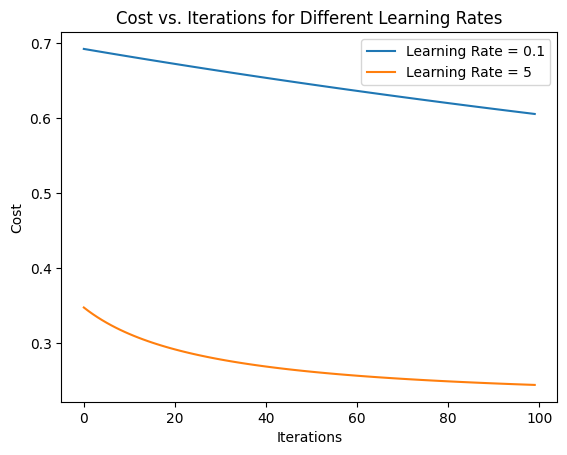

In [189]:
#Compare learning rates 0.1 and 5
alpha_5 = 5
iterations = 100
_, cost_history_5 = gradient_descent(X, y, theta, alpha_5, iterations)

plt.figure()
plt.plot(range(iterations), cost_history[:iterations], label="Learning Rate = 0.1")
plt.plot(range(iterations), cost_history_5, label="Learning Rate = 5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations for Different Learning Rates")
plt.legend()
plt.show()

# Q5: Compute confusion matrix and metrics

In [190]:
#Defining a prediction function
def predict(X, theta):
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

y_pred = predict(X, optimal_theta)
confusion_matrix = pd.crosstab(y, y_pred, rownames=["Actual"], colnames=["Predicted"])

print("Confusion Matrix:")
print(confusion_matrix)

#Calculate performance metrics
accuracy = np.mean(y == y_pred)
precision = confusion_matrix.loc[1, 1] / (confusion_matrix.loc[0, 1] + confusion_matrix.loc[1, 1])
recall = confusion_matrix.loc[1, 1] / (confusion_matrix.loc[1, 0] + confusion_matrix.loc[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Confusion Matrix:
Predicted   0   1
Actual           
0          46   4
1           7  43
Accuracy: 0.89
Precision: 0.91
Recall: 0.86
F1 Score: 0.89
